# DATE STATISTICS

1. [Min, max](#gen-stats)
2. [Number of records per year](#records-per-year) 
3. [Missing dates](#missing-dates)
4. [Value of date field](#date-field-value)

In [2]:
import os

# SHARE data file, each line is a record
SHARE_FILE = os.path.join('..', '..', 'data', 'share-jan-2019.json')

In [75]:
import json
from collections import defaultdict
from dateutil.parser import parse

records_per_year = defaultdict(int)

records_with_missing_date_per_source = {
    'date' : defaultdict(int),
    'date_published' : defaultdict(int),
    'date_updated' : defaultdict(int),
    'date_created' : defaultdict(int),
    'date_modified' : defaultdict(int),
}

# contains the source of the date field value
# source can be the date_published, date_updated, date_created, or date_modified
# for more info, see https://share-research.readthedocs.io/en/latest/elasticsearch.html#fields-indexed-by-elasticsearch
date_field_value_source_per_record = []

date_types = records_with_missing_date_per_source.keys()

with open(SHARE_FILE, 'r') as f:
    for line in f:
        data = json.loads(line)
        
        records_per_year[parse(data['date']).year] += 1
        
        for date_type in date_types:
            if data[date_type] is None:
                for source in data['sources']:
                    records_with_missing_date_per_source[date_type][source] += 1
                    
                records_with_missing_date_per_source[date_type]['-Total Records-'] += 1
                
        if data['date'] == data['date_published']:
            date_field_value_source_per_record.append('date_published')
        elif data['date'] == data['date_updated']:
            date_field_value_source_per_record.append('date_updated')
        elif data['date'] == data['date_created']:
            date_field_value_source_per_record.append('date_created')
        elif data['date'] == data['date_modified']:
            date_field_value_source_per_record.append('date_modified')

## <a id='gen-stats'>GENERAL STATISTICS</a>

In [40]:
print('Earliest year: {}'.format(min(records_per_year.keys())))
print('Latest year: {}'.format(max(records_per_year.keys())))

Earliest year: 1950
Latest year: 2019


## <a id='records-per-year'>RECORDS PER YEAR</a>

In [41]:
# since there are very few records before 2007, combine them for a better-looking graph

binned_records_per_year = { 2006 : 0 }

for year, count in records_per_year.items():
    if year < 2007:
        binned_records_per_year[2006] += count
    else:
        binned_records_per_year[year] = count

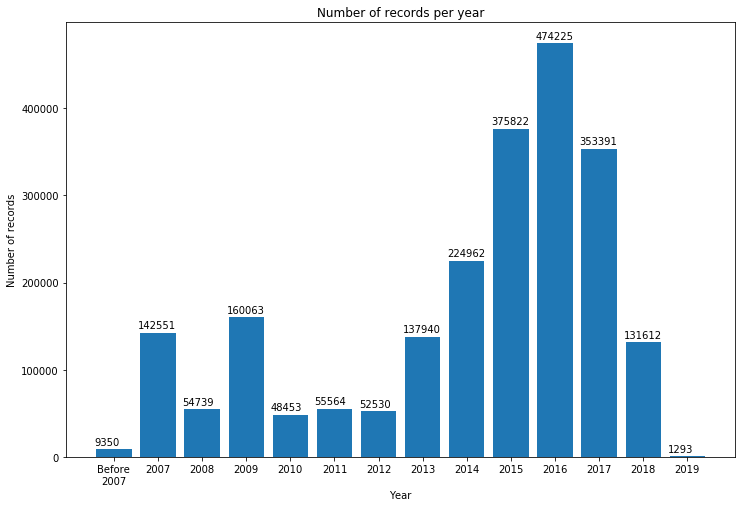

In [42]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

years, records = zip(*sorted(binned_records_per_year.items(), key = lambda kv: kv[0]))
years = list(years)
years[0] = 'Before\n2007'

plt.figure(figsize=(12,8))
plt.title('Number of records per year')
plt.xlabel('Year')
plt.ylabel('Number of records')

plt.bar(range(len(years)), records)
plt.xticks(range(len(years)), years)

for i, v in enumerate(records):
    plt.text(range(len(years))[i] - 0.45, v + 5000, str(v))

plt.show()

## <a id='missing-dates'>MISSING DATES</a>

In [47]:
MISSING_DATES_OUTPUT_FILE = os.path.join('..', '..', 'data_exploration_results', 'missing_dates.csv')

In [53]:
import pandas as pd

df_missing_dates = pd.DataFrame(records_with_missing_date_per_source)
df_missing_dates = df_missing_dates.fillna(0)
df_missing_dates = df_missing_dates.astype(int)

df_missing_dates.to_csv(MISSING_DATES_OUTPUT_FILE)

In [ ]:
df_missing_dates.sort_values('date_published', ascending = False)[:11]

### RECORDS WITH MISSING DATE_PUBLISHED

In [65]:
print('Number of sources with some (or all) records missing date published: {}'.format(
    df_missing_dates[df_missing_dates['date_published'] > 1].shape[0]))

print('Total number of records: {}'.format(df_missing_dates['date_published']['-Total Records-']))

Number of sources with some (or all) records missing date published: 58
Total number of records: 2085123


In [67]:
df_missing_dates[df_missing_dates['date_published'] > 1].sort_values('date_published', ascending = False)

,date,date_published,date_updated,date_created,date_modified
-Total Records-,0,2085123,1264,0,0
arXiv,0,1253614,0,0,0
Research Papers in Economics,0,783884,0,0,0
CrossRef,0,374541,0,0,0
Hyper Articles en Ligne (HAL),0,70218,0,0,0
CERN Document Server,0,26857,0,0,0
Preprints.org,0,8603,0,0,0
Munich Personal RePEc Archive,0,4786,0,0,0
DataCite MDS,0,2727,0,0,0
DSpace@MIT,0,2623,0,0,0


### RECORDS WITH MISSING DATE_UPDATED

In [68]:
print('Number of sources with some (or all) records missing date updated: {}'.format(
    df_missing_dates[df_missing_dates['date_updated'] > 1].shape[0]))

print('Total number of records: {}'.format(df_missing_dates['date_updated']['-Total Records-']))

Number of sources with some (or all) records missing date updated: 2
Total number of records: 1264


In [70]:
df_missing_dates[df_missing_dates['date_updated'] > 1].sort_values('date_updated', ascending = False)

,date,date_published,date_updated,date_created,date_modified
-Total Records-,0,2085123,1264,0,0
AgEcon Search,0,0,1264,0,0


### RECORDS WITH MISSING DATE_CREATED

In [72]:
print('Number of sources with some (or all) records missing date created: {}'.format(
    df_missing_dates[df_missing_dates['date_created'] > 1].shape[0]))

Number of sources with some (or all) records missing date created: 0


### RECORDS WITH MISSING DATE_MODIFIED

In [74]:
print('Number of sources with some (or all) records missing date modified: {}'.format(
    df_missing_dates[df_missing_dates['date_modified'] > 1].shape[0]))

Number of sources with some (or all) records missing date modified: 0


## <a id='date-field-value'>VALUE OF DATE FIELD</a>

In [105]:
df_date_field_value = pd.DataFrame([dict(Counter(date_field_value_source_per_record))])

df_date_field_value

,date_published,date_updated
0,137372,2085123
